# Configuration

In [1]:
import matplotlib.pyplot as plt
from pathlib import Path

IMAGES_PATH = Path() / "images" / "training_linear_models"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear Regression

## The normal ecuation

In [2]:
import numpy as np

np.random.seed(42)

m = 100 # the number of instances
X = 2 * np.random.rand(m , 1) # column vector
y = 4 + 3 * X + np.random.rand(m, 1) # column vector


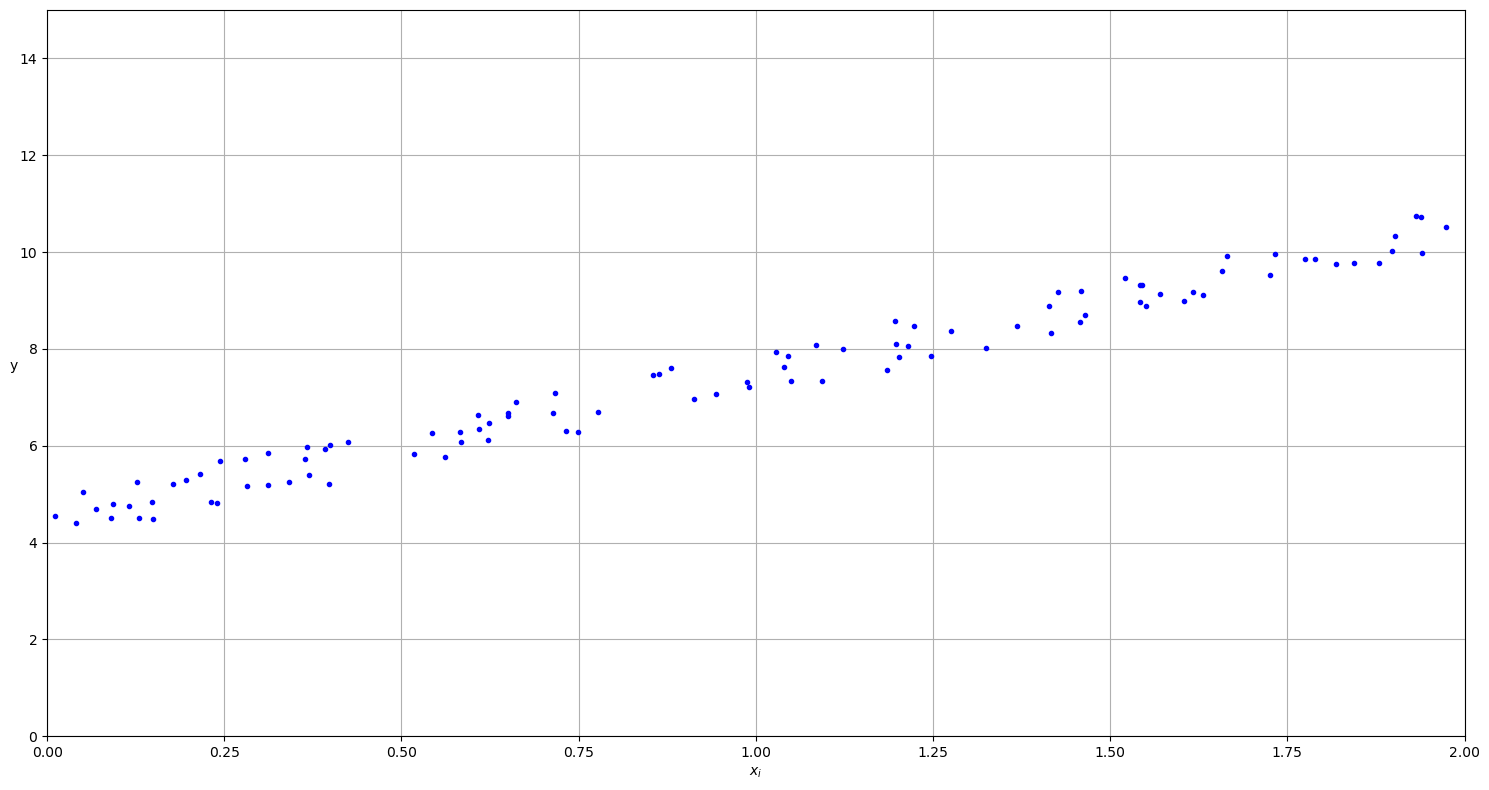

In [3]:
plt.figure(figsize = (15, 8))
plt.plot(X, y, "b.")
plt.ylabel("y", rotation = 0)
plt.xlabel("$x_i$")
plt.axis([0, 2., 0, 15])
plt.grid()
save_fig("generated_data")
plt.show()

In [16]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X) # add x_0 = 1 to each instances
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [17]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [39]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new) 
y_pred = X_new_b @ theta_best
y_pred

array([[ 4.51359766],
       [10.48006601]])

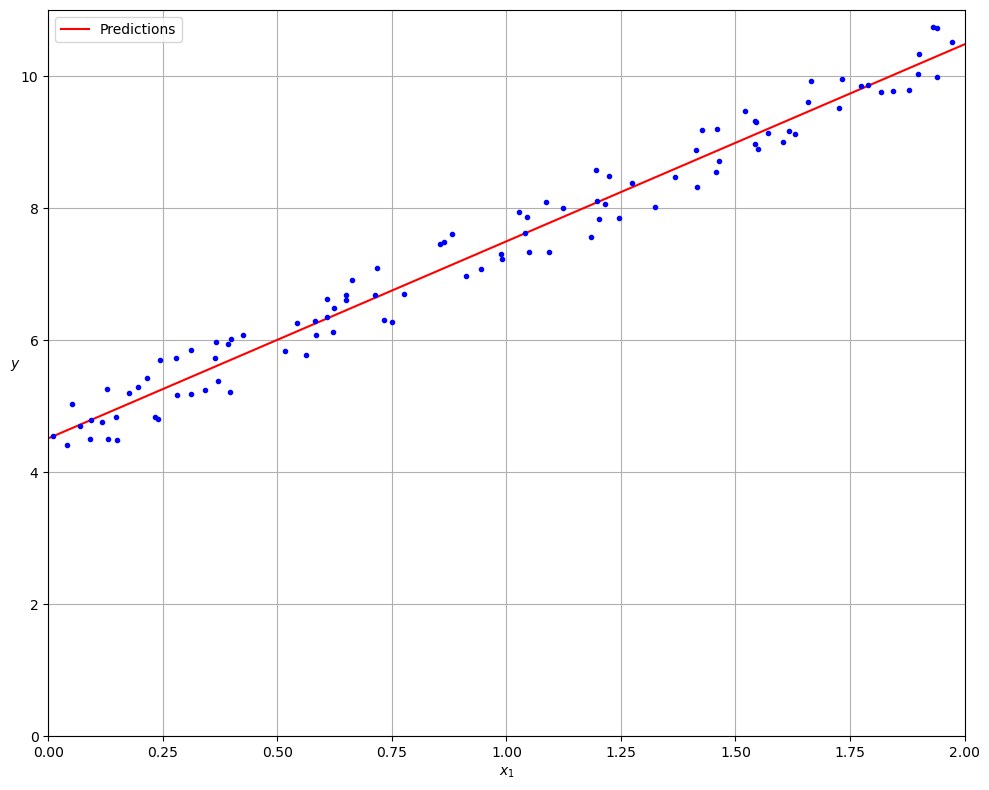

In [32]:
plt.figure(figsize = (10, 8))

plt.plot(X_new, y_pred, 'r-', label = 'Predictions')
plt.plot(X, y, 'b.')
plt.axis([0, 2., 0, 11.])
plt.ylabel("$y$", rotation = 0)
plt.xlabel("$x_1$")
plt.grid()
plt.legend()
save_fig("linear_model_predictions")
plt.show()

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.51359766]), array([[2.98323418]]))

In [34]:
lin_reg.predict(X_new)

array([[ 4.51359766],
       [10.48006601]])

In [ ]:
theta_best_svd, residual, rank, s = np.linalg.lstsq(X_b, y, rcond = 1e-6) # linear algebra "least squared" method
theta_best_svd

array([[4.51359766],
       [2.98323418]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [41]:
np.linalg.pinv(X_b) @ y

array([[4.51359766],
       [2.98323418]])

# Gradient Descent